#Data Preprocessing Techniques
##Preprocessing techniques:
1. Data Cleaning
  * Data Imputation
  * Feature Scaling
2. Feature Transformation
  * Polynomial Features
  * Discretization
  * Handling Categorical Features
  * Custome Transformers
  * Composite Transformers
    * Apply transformation to diverse features
    * TargetTransormedRegressor
3. Feature Selection
  * Filter based feature selection
  * Wrapper based feature selection
4. Feature Extraction
  * PCA
* Pipeline - To specify the order of transformation
* FeatureUnion - To combine the output of multiple transformation into a single transformed feature matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')

#1. Feature Extraction:
##DictVectorizer - converts a list of dictionary objects to feature matrix

In [ ]:
data = [{'age':4, 'height': 96.0},
        {'age':1, 'height': 73.9},
        {'age':3, 'height': 88.9},
        {'age':2, 'height': 81.6} ]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
print(data_transformed)
print(data_transformed.shape)

[[ 4.  96. ]
 [ 1.  73.9]
 [ 3.  88.9]
 [ 2.  81.6]]
(4, 2)


#2. Data Imputation:
sklearn.impute have SimpleImputer class.
Some important parameters:
* strategy: mean, median, most_frequent, constant
  * mean, median - only for numeric data
  * most_frequent and constant - for string or numeric data
* missing_values: could be int, float, str, np.nan(default) or None
* add_indicator - a boolean parameter that when set to True returns missing value indicators in indicator_ member variable

###Data Imputation on real world dataset:

In [ ]:
from sklearn.impute import SimpleImputer
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
#heart_data = pd.read_csv('/content/processed.cleveland.data', header=None, names=cols)
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, names=cols)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


###STEP1: Check if dataset have missing values
* for numeric features, check for number of nan or np.nan values
* for non-numerical features, list unique values and check for special charaters like ?

In [ ]:
heart_data.info()
heart_data.isnull().sum()
print('unique values for ca', heart_data.ca.unique())
print('unique values for thal', heart_data.thal.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
unique values for ca ['0.0' '3.0' '2.0' '1.0' '?']
unique values for thal ['6.0' '3.0' '7.0' '?']


In [ ]:
print('number of missing values in ca: ', heart_data.loc[heart_data.ca == '?', 'ca'].count())
print('number of missing values in thal: ', heart_data.loc[heart_data.thal == '?', 'thal'].count())

number of missing values in ca:  4
number of missing values in thal:  2


###STEP2: Replace '?' with nan

In [ ]:
heart_data.replace('?', np.nan, inplace=True)

###STEP3: Fill the missing values with sklearn missing value imputation utilities

1. add_indicator = False (default)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 14)


* add_indicator = True

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
imputer = imputer.fit(heart_data)
heart_data_imputed_with_indicator = imputer.transform(heart_data)
print(heart_data_imputed_with_indicator.shape)

(303, 16)


#3. Feature Scaling: to make all features are on the same scale
Advantages:
* Faster convergence
* performance of some ML algorithms SVM, KNN, and K-means, etc that compute euclidian distance among input samples impacted if features are not scaled.    

Feature Scaling Methods:
* Standardization
* Normalization
* MaxAbsScalar   
  
We can use abalone dataset.


In [ ]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
#abalone_data = pd.read_csv('/content/abalone.data', header=None, names=cols)
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=cols)
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


##Step1: Examine the dataset:

In [ ]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
abalone_data = abalone_data.replace({"Sex": {"M":1, "F":2, "I":3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


##Step2: Separate labels from features

In [ ]:
y = abalone_data.pop("Rings")
print("The dataframe object after deleting the last column:")
abalone_data.info()

The dataframe object after deleting the last column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


##Step 3: Examine Feature scales
###1. Statistical method:

In [ ]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


###2. Visualization method:

In [ ]:
abalone_data.iloc[:,0]

0       1
1       1
2       2
3       1
4       3
       ..
4172    2
4173    1
4174    1
4175    2
4176    1
Name: Sex, Length: 4177, dtype: int64

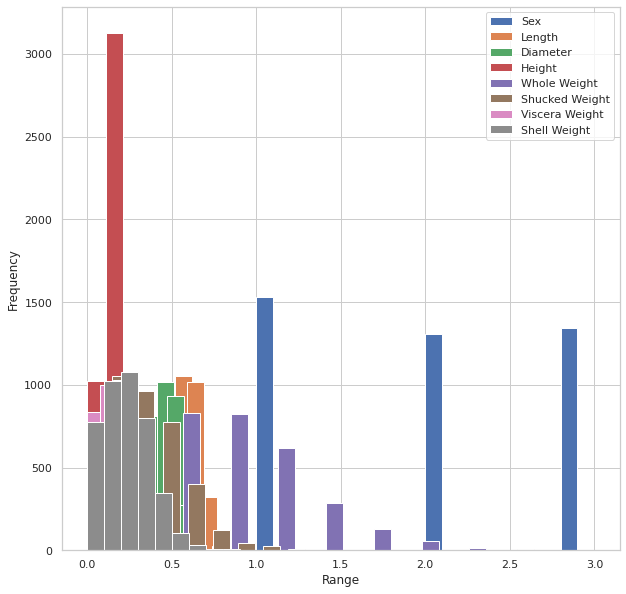

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(abalone_data.iloc[:,0], width=0.1, label='Sex')
plt.hist(abalone_data.iloc[:,1], width=0.1, label='Length')
plt.hist(abalone_data.iloc[:,2], width=0.1, label='Diameter')
plt.hist(abalone_data.iloc[:,3], width=0.1, label='Height')
plt.hist(abalone_data.iloc[:,4], width=0.1, label='Whole Weight')
plt.hist(abalone_data.iloc[:,5], width=0.1, label='Shucked Weight')
plt.hist(abalone_data.iloc[:,6], width=0.1, label='Viscera Weight')
plt.hist(abalone_data.iloc[:,7], width=0.1, label='Shell Weight')
plt.legend()
plt.xlabel('Range')
plt.ylabel('Frequency')
plt.show()

* KDE Plot: Kernel Density Estimate - In Statistibs, KDE is a non-parametric way to estimate the probability density function (PDF) of a random variable.   
This function uses Gaussian kernals and includes automatic bandwidth determination.

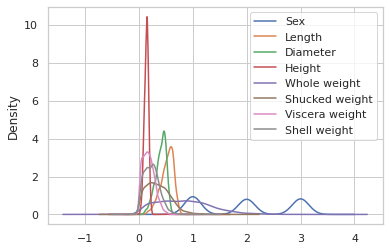

In [ ]:
ax = abalone_data.plot.kde()

* Box plt - A box plot or Box and Whisker plot shows the distribution of quantitative datain a way that facilitates comparison between variables or across leves of a categorical variable.   
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for the points that are determined to be outliers using a method that is a function of the interquartile range.

* Violin Plot  - It is similar to Box plot. It shows the distribution of quantitative data across leves of a categorical variable such that those distribution can be compared.   
* Unlike a box plot , in which all of the plot components correspond to actual data points, the violin plot features a kernal density estimation of the underlying distribution.

##Step4: Scaling
### Normalization 
Features are normalized such that their range lies between [0, 1] or [-1, 1]. 
* MaxAbsoluteScalar - transforms features in range [-1, 1]
* MinMaxScalar - transforms features in range [0, 1]

###MaxAbsoluteScalar
$$ x^1 = \frac {x}{MaxAbsoluteValue}
$$
where MaxAbsoluteValue = max(x.max, |x.min|)

In [ ]:
x = np.array([4, 2, 5, -2, -100]).reshape(-1, 1)
print(x)

[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


In [ ]:
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.02]
 [-1.  ]]


###MinMaxScalar
$$ x_{new} = \frac {x_{old} - {x_min}}{x_{max} - x_{min}}
$$

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = abalone_data
mms = MinMaxScaler()
X_normalized = mms.fit_transform(X)
print(X_normalized[:5])

[[0.         0.51351351 0.5210084  0.0840708  0.18133522 0.15030262
  0.1323239  0.14798206]
 [0.         0.37162162 0.35294118 0.07964602 0.07915707 0.06624075
  0.06319947 0.06826109]
 [0.5        0.61486486 0.61344538 0.11946903 0.23906499 0.17182246
  0.18564845 0.2077728 ]
 [0.         0.49324324 0.5210084  0.11061947 0.18204356 0.14425017
  0.14944042 0.15296462]
 [1.         0.34459459 0.33613445 0.07079646 0.07189658 0.0595158
  0.05134957 0.0533134 ]]


###Standardization
$$ x_{new} = \frac {x_{old} - μ}{σ}
$$

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_standardized = ss.fit_transform(X)
print(X_standardized[:5])

[[-1.15434629 -0.57455813 -0.43214879 -1.06442415 -0.64189823 -0.60768536
  -0.72621157 -0.63821689]
 [-1.15434629 -1.44898585 -1.439929   -1.18397831 -1.23027711 -1.17090984
  -1.20522124 -1.21298732]
 [ 0.05379815  0.05003309  0.12213032 -0.10799087 -0.30946926 -0.4634999
  -0.35668983 -0.20713907]
 [-1.15434629 -0.69947638 -0.43214879 -0.34709919 -0.63781934 -0.64823753
  -0.60759966 -0.60229374]
 [ 1.26194258 -1.61554351 -1.54070702 -1.42308663 -1.27208566 -1.2159678
  -1.28733718 -1.32075677]]


In [ ]:
print(X_standardized.mean(axis=0))
print(X_standardized.std(axis=0))

[-1.19075871e-17 -5.83471770e-16 -3.02792930e-16  3.91249292e-16
  9.18585294e-17 -1.02065033e-17  2.70472337e-16  2.97689679e-16]
[1. 1. 1. 1. 1. 1. 1. 1.]



#4. add_dummy_feature

In [ ]:
from sklearn.preprocessing import add_dummy_feature
x = np.array([[7, 1],
              [1, 8],
              [2, 0],
              [9, 6]])
x_dummy = add_dummy_feature(x)
print(x_dummy)

[[1. 7. 1.]
 [1. 1. 8.]
 [1. 2. 0.]
 [1. 9. 6.]]


#5. Custom transformers
Enable conversion of an existing Python function into a transformer to assist in data cleaning or processing.   
Useful when:
1. The dataset consists of hetrogenious data types(eg raster images and text captions).
2. The dataset is stored in pandas.DataFrame and different columns require different processing pipelines.
3. We need stateless transformations such as taking rhe log of frequencies, custom scaling etc.

We can implement a transformer from an arbitrary function with FunctionTransformer.

In [ ]:
from sklearn.preprocessing import FunctionTransformer
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
transformer = FunctionTransformer(np.log1p, validate=True)  ###### np.log1p returns natural logarithm of (1 + feature value)
wine_data_transformed = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed, columns=wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


#6. Polynomial Features
sklearn.preprocessing.PolynomialFeatures enable us to perform polynomial transformation of desired degree

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
wine_data_copy = wine_data.copy()
wine_data_without_label = wine_data.drop(['quality'], axis=1)
print('Number of features before transformation: ', wine_data_without_label.shape)

poly= PolynomialFeatures(degree=2)
poly_wine_data = poly.fit_transform(wine_data_without_label)
print('Number of features after transformation: ', poly_wine_data.shape)

Number of features before transformation:  (1599, 11)
Number of features after transformation:  (1599, 78)


In [ ]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

#7. Discretization (Quantization or binning)
Discretization provides a way to partition continuous features into discrete values.
* Discretization can transform the dataset of continuous attributes to one with only nominal attributes.
* One-hot encoded discretized features can make a model more expressive, while maintaining interpretability.
* Pre-processing with discretizer can introduce non-linearity to linear models.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
wine_data_copy1 = wine_data_copy.copy()
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
x = np.array(wine_data_without_label['chlorides']).reshape(-1,1)
x_binned = enc.fit_transform(x)

In [ ]:
x_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

#8. Handling Categorical Features
1. Ordinal Encoding
2. One-hot Encoding
3. Label Encoder
4. Using Dummy variables

##Ordinal Encoding
These non-numeric data should be converted to numeric form for feeding then for an ML model.

|Old feature   | New feature |
| ------------ | ----------- |
|Punjab        | 1           |
|Rajasthan     | 2           |
|Haryana       | 3           |

If there is no order in the categorincal data, the above conversion is misleading

##One hot Encoding
Create an additional feature for each label present in the categorical feature, and putting a 1 or 0 for these new features depending on the value of the categorical feature's value.

| Old Feature | New feature1 | New feature2 | New feature3 |
| ----------- | ------------ | ------------ | ------------ |
| Punjab      | 1            | 0            | 0            |
| Rajasthan   | 0            | 1            | 0            |
| Haryana     | 0            | 0            | 1            |



In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are three class labels. We will convert them to one hot vectors

In [ ]:
onehotencoder = OneHotEncoder(categories='auto')
print('shape of y before encoding: ', iris_data.label.shape)

iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1,1))
print('shape of y after encoding: ', iris_labels.shape)
print(iris_labels.toarray()[:5])

shape of y before encoding:  (150,)
shape of y after encoding:  (150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Let us observe the difference between Ordinal encoder

In [ ]:
enc = OrdinalEncoder()
iris_labels = np.array(iris_data['label'])
iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1,1))
print('Unique labels: ', np.unique(iris_labels_transformed))
print(iris_labels_transformed[:5])

Unique labels:  [0. 1. 2.]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


##LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
iris_labels = np.array(iris_data['label'])

enc = LabelEncoder()
label_integer = enc.fit_transform(iris_labels)
print(label_integer)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


##MultiLabelBinarizer
Encodes categorical features with value between 0 and k-1, where k is the number of classes

In [ ]:
movie_genres = [{'action', 'comedy'},
                {'comedy'},
                {'action', 'thriller'},
                {'science-fiction', 'action', 'thriller'}]

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
movie_transformed = mlb.fit_transform(movie_genres)
print(movie_transformed)

[[1 1 0 0]
 [0 1 0 0]
 [1 0 0 1]
 [1 0 1 1]]


##Using Dummy Variables

In [ ]:
iris_data_onehot = pd.get_dummies(iris_data, columns=['label'], prefix=['one_hot'])
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


#9. Composite Transformers
##Column Transformers 
It applies a set of transformers to columns of an array or pandas.DataFrame, concatenates the transferred outputs from different transformers into a single matrix.
* It is useful for transforming hetrogenous data by applying different transformers to separate subsets of features.
* It combines different feature selection mechanism and transformation into a single transformer object.


In [ ]:
x = [[20.0, 'male'],
     [11.2, 'female'],
     [15.6, 'female'],
     [13.0, 'male'],
     [18.6, 'male'],
     [16.4, 'female']]
x = np.array(x)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([('scalar', MaxAbsScaler(), [0]),
                        ('pass', 'passthrough', [0]),
                        ('encoder', OneHotEncoder(), [1])])
ct.fit_transform(x)

array([['1.0', '20.0', '0.0', '1.0'],
       ['0.5599999999999999', '11.2', '1.0', '0.0'],
       ['0.78', '15.6', '1.0', '0.0'],
       ['0.65', '13.0', '0.0', '1.0'],
       ['0.93', '18.6', '0.0', '1.0'],
       ['0.82', '16.4', '1.0', '0.0']], dtype='<U32')

##TrasformedTargetRegressor
Transforms the target variable y before fitting a regression model.
* Predicted values are mapped back to the original space via an inverse transform.
* It takes regressor and transformer to be applied to the target variable as arguments.

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [ ]:
X, y = fetch_california_housing(return_X_y=True)
X, y = X[:2000], y[:2000]

transformer = MaxAbsScaler()

regressor = LinearRegression()

regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr.fit(X_train, y_train)
print('R2 score of raw label regression: {0:.2f}'.format(regr.score(X_test, y_test)))
raw_target_regr = LinearRegression().fit(X_train, y_train)
print('R2 score of transformed label regression: {0:.2f}'.format(raw_target_regr.score(X_test, y_test)))

R2 score of raw label regression: 0.59
R2 score of transformed label regression: 0.59


#10. Feature Selection
sklearn.feature_selection module have useful APIs to select features/reduce dimensionality, either to improve estimators accuracy scores or to boost their performance on very high-dimentional datasets.
##Filter Based Models
###Variance Threshold
This transformer helps to kee only high variance features by providing a certain threshold.
* Features with variance >= a threshold value are kept, rest are removed.
* By default it removes any feature with same value. ie 0 variance. 

In [ ]:
data = [{'age':4, 'height': 96.0},
        {'age':1, 'height': 73.9},
        {'age':3, 'height': 88.9},
        {'age':2, 'height': 81.6} ]

dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
np.var(data_transformed, axis=0)

array([ 1.25 , 67.735])

In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=9)
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

###Select KBest
It selects k highest scoring features based on a function and removes the rest of the features.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression

X_california, y_california = fetch_california_housing(return_X_y=True)
X, y = X_california[:2000], y_california[:2000]
print(f'shape of the feature matrix before selection: {X.shape}')

shape of the feature matrix before selection: (2000, 8)


In [ ]:
skb = SelectKBest(mutual_info_regression, k=3)
X_new = skb.fit_transform(X, y)
print(f'shape of the feature matrix after selection: {X_new.shape}')
skb.get_feature_names_out()

shape of the feature matrix after selection: (2000, 3)


array(['x0', 'x6', 'x7'], dtype=object)

###Select Percentile
It select top percentile of all features and drops the rest of the features.
Similar to SelectKBest, it also uses scoring function to decide important features.

In [ ]:
from sklearn.feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression, percentile=30)
x_new = sp.fit_transform(X, y)
print(x_new.shape)
sp.get_feature_names_out()

(2000, 3)


array(['x0', 'x6', 'x7'], dtype=object)

###GenericUnivariateSelect
It applies univariate feature selection with a certain strategy, which is passed to the API via mode parameter. Mode can take only one of the parameters:- percentile(top percentage), k_best(top k), fpr(false positive rate), fdr(false discovery rate), fwe(family wise error rate)

In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect
gus = GenericUnivariateSelect(mutual_info_regression, mode='k_best', param=3)
X_new = gus.fit_transform(X, y)
print(f'shape of the feature matrix before selection: {X.shape}')
print(f'shape of the feature matrix after selection: {X_new.shape}')

shape of the feature matrix before selection: (2000, 8)
shape of the feature matrix after selection: (2000, 3)


##Wrapper based methods
###RFE (Recursive Feature Elimination)
1. step1. Fits a model
2. Ranks the features and then removes one or more features depends upon step parameter.   

These two steps are repeated until desired number of features are selected.

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X, y)
### support_ attribute is a boolean array marking which features are selected
print(selector.support_)

#features with rank 1 is selected, 2 and more is least ranked
print('Rank of each feature is: ', selector.ranking_)

[ True False False False False False  True  True]
Rank of each feature is:  [1 5 4 3 6 2 1 1]


In [ ]:
X_new = selector.transform(X)
print('Shape of feature matrix after feature selection: ', X_new.shape)

Shape of feature matrix after feature selection:  (2000, 3)


###RFE-CV
This adds another layer of cross validation to RFE

###Select from Model
* Selects desired number of important features (as specified with max_features parameter) above certain threshold of feature importance as obtained from the trained estimator.
* The feature importance is obtained via coef_, feature_importances_, or an importance_getter callable from the trained estimator. 
* The feature importance threshold can be specified either numerically or using a string argument based on built-in heuristics such as mean, median and float multiples of these like 0.1 * mean

In [ ]:
from sklearn.feature_selection import SelectFromModel
estimator = LinearRegression()
estimator.fit(X, y)
print(f'coefficients of features: {estimator.coef_}')
print(f'indices of top {3} features: {np.argsort(estimator.coef_)[-3:]}')
t = np.argsort(np.abs(estimator.coef_)[-3:])
model = SelectFromModel(estimator, max_features=3, prefit=True)
X_new = model.transform(X)
print('Shape of feature matrix after feature selection: ', X_new.shape)

coefficients of features: [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
indices of top 3 features: [1 2 0]
Shape of feature matrix after feature selection:  (2000, 3)


###Sequential Feature Selection
It performs feature selection by selecting or deselecting features one by one in a greedy manner.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
#%%time
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit_transform(X, y)
print(sfs.get_support())

[ True False False False False  True  True False]


The features corresponding to TRUE in the support are selected

In [ ]:
estimator = LinearRegression()
sfn = SequentialFeatureSelector(estimator, n_features_to_select=3, direction='backward')
sfn.fit_transform(X, y)
print(sfs.get_support())

[ True False False False False  True  True False]


#11. PCA
PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that capture maximum amount of the variance. It helps in reducing the dimensions of a dataset, thus coputational cost of next steps, like training a model, cross validation etc also reduces.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
print(f'The {pca.n_components_} principal axis are:\n', pca.components_)

The 2 principal axis are:
 [[ 3.58746278e-04 -5.26626273e-03 -3.55739438e-04 -1.04636644e-04
   9.99985993e-01  1.07189337e-04 -3.72926795e-05 -3.18638902e-05]
 [ 2.83042309e-02 -9.96787172e-01  7.04618553e-02  1.11176863e-02
  -5.23215008e-03 -1.02817045e-03  1.45200590e-02  1.69252465e-02]]


In [ ]:
print('Explained variance by each components: ', pca.explained_variance_)
print('Mean across x1 and x2 direction is: ', pca.mean_)

Explained variance by each components:  [9.32990794e+05 1.72499472e+02]
Mean across x1 and x2 direction is:  [ 3.88541705e+00  3.13105000e+01  5.89404425e+00  1.15137723e+00
  1.24335450e+03  2.72214812e+00  3.80665650e+01 -1.21940045e+02]


#12. Chaining Transformers
The preprocessing transformations are applied one after the other on the input feature matrix.
* It is important to apply exactly same transformation on training, evaluation and test dataset in the same order.   

Failing to do so would lead to incorrect predictions from model due to distribution shift and hence incorrect performance evaluation.   
The sklearn.pipeline module provides utilities to build a composite estimator, as chain of transformers and estimators.

##Pipeline
Sequentially apply a list of transformers and estimators.
* Intermediate steps of pipeline must be 'transformers', that is, they must implement fit and transform method.
* The final estimator only needs to implement 'fit'.   

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

###Creating pipelines
A pipeline can be created with Pipeline(). It takes a list of ('EstimatorName', estimator(...)) tuples. The pipeline object exposes interface of the last step.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

estimators = [('simpleimputer', SimpleImputer()),
              ('standarsscalar', StandardScaler())
              ]
pipeline = Pipeline(steps=estimators)

In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(SimpleImputer(),
                     StandardScaler())

###Accessing individual steps in a pipeline

In [ ]:
from sklearn.decomposition import PCA
estimators = [('simpleimputer', SimpleImputer()),
              ('pca', PCA()),
              ('regressor', LinearRegression())
              ]
pipe = Pipeline(steps=estimators)
print(len(pipe.steps))
print(pipe.steps)
print(pipe.named_steps.pca)

3
[('simpleimputer', SimpleImputer()), ('pca', PCA()), ('regressor', LinearRegression())]
PCA()


###Accessing parameters of a step in pipeline 
* using __ (double underscore)

In [ ]:
estimators = [('simpleimputer', SimpleImputer()),
              ('pca', PCA()),
              ('regressor', LinearRegression())
              ]
pipe = Pipeline(steps=estimators)
pipe.set_params(pca__n_components = 2)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

here n_components of PCA() step is set after the pipeline is created.

###GridSearch with pipeline
By using naming convention of nested parametrs, grid search can be implemented.

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer = ['passthrough',
                             SimpleImputer(),
                             KNNImputer()],
                  clf=[SVC(), LogisticRegression()],
                  clf__C = [0.1, 10, 100]
                  )
grid_search = GridSearchCV(pipe, param_grid=param_grid)

###Caching Transformers
Transforming data is computationally expensive step.
* for grid search, transformers need not be applied for every parameter configuration. They can be applied only once and the transformed data can be reused.
* This can be achieved by setting memory parameter of a pipeline object.

In [ ]:
import tempfile
tempDirPath = tempfile.TemporaryDirectory()

estimators = [('simpleimputer', SimpleImputer()),
              ('pca', PCA(2)),
              ('regressor', LinearRegression())
              ]
pipe = Pipeline(steps=estimators, memory=tempDirPath)

##Feature Union
Concatenates the result of multiple transformer object.
* Applies a list of transformer objects in parallel, and their outputs are concatenated side-by-side into a larger matrix.   

FeatureUnion and Pipeline can be used to create complex transformers.

#13. Visualizing Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('selector', ColumnTransformer([('select_first_4', 'passthrough', slice(0,4))])),
                         ('imputer', SimpleImputer(strategy='median')),
                         ('std_scalar', StandardScaler())
                         ])
cat_pipeline = ColumnTransformer([('label_binarizer', LabelBinarizer(), [4]),
                                ])
full_pipeline = FeatureUnion(transformer_list=
                             [("num_pipeline", num_pipeline),
                              ("cat_pipeline", cat_pipeline)
                            ] )

In [ ]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scalar',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

#14 Handling Imbalance Data
Imbalanced dataset are those where one class is very less represented than the other class. This kind of data results in less efficient ML algorithms.   

There are two main approaches to handle imbalanced data:
* Undersampling
* Oversmapling

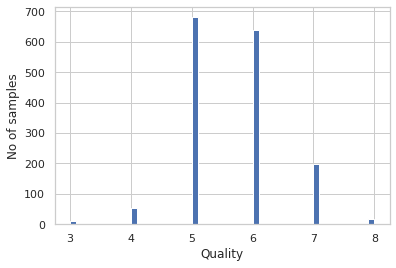

In [ ]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('No of samples')
plt.show()

In [ ]:
wine_data.shape

(1599, 12)

##UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
class_count_3, class_count_4, class_count_5, class_count_6, class_count_7, class_count_8 = wine_data['quality'].value_counts()
class_3 = wine_data[wine_data['quality'] == 3]
class_4 = wine_data[wine_data['quality'] == 4]
class_5 = wine_data[wine_data['quality'] == 5]
class_6 = wine_data[wine_data['quality'] == 6]
class_7 = wine_data[wine_data['quality'] == 7]
class_8 = wine_data[wine_data['quality'] == 8]
print('class_3: ', class_3.shape)
print('class_4: ', class_4.shape)
print('class_5: ', class_5.shape)
print('class_6: ', class_6.shape)
print('class_7: ', class_7.shape)
print('class_8: ', class_8.shape)

class_3:  (10, 12)
class_4:  (53, 12)
class_5:  (681, 12)
class_6:  (638, 12)
class_7:  (199, 12)
class_8:  (18, 12)


In [ ]:
from collections import Counter
X = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']
undersample = RandomUnderSampler(random_state=0)
X_rus, y_rus = undersample.fit_resample(X, y)
print('Original dataset shape: ', Counter(y))
print('Resample dataset shape: ', Counter(y_rus))

Original dataset shape:  Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape:  Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


##OverSampling
Oversampling refers to replicating some points from the minority class in order to increase the cardinality of the minority class. This might consist of either replicating or generating synthetic data for minority class.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)
print('Original dataset shape: ', Counter(y))
print('Resample dataset shape: ', Counter(y_ros))

Original dataset shape:  Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample dataset shape:  Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [ ]:
print(X_ros.shape[0] - X.shape[0] , 'new random pionts generated with randomOverSampler')

2487 new random pionts generated with randomOverSampler


###OverSampling using SMOTE(Synthetic Minority Oversampling TEchnique)
Types:
* Borderline SMOTE
* Borderline SMOTE SVM
* Adaptive Synthetic Sampling(ADASYN)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)
counter = Counter(y_sm)
print(counter)

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})
